In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
import kagglehub

In [3]:
path = kagglehub.dataset_download("kmader/food41")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/food41


In [4]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [6]:
train_ds2 = image_dataset_from_directory(
    f"{path}/images",
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds2 = image_dataset_from_directory(
    f"{path}/images",
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 101000 files belonging to 101 classes.
Using 80800 files for training.


I0000 00:00:1755840602.351851      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755840602.352537      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


In [10]:
class_names = train_ds2.class_names
num_classes = len(class_names)
print(f"총 {num_classes}개의 클래스가 준비되었습니다.")

총 101개의 클래스가 준비되었습니다.


첫번째 학습

In [14]:
base_model = EfficientNetB0(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
base_model.trainable = False

In [16]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [17]:
model = Model(inputs=base_model.input, outputs=predictions)

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [19]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
]

In [21]:
EPOCHS = 10
history = model.fit(
    train_ds2,
    validation_data=val_ds2,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/10


I0000 00:00:1755840750.612394     112 service.cc:148] XLA service 0x7ca3b400f310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755840750.613072     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755840750.613095     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755840752.464982     112 cuda_dnn.cc:529] Loaded cuDNN version 90300


   3/2525 ━━━━━━━━━━━━━━━━━━━━ 1:54 45ms/step - accuracy: 0.0122 - loss: 4.6678       

I0000 00:00:1755840761.789421     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 258s 92ms/step - accuracy: 0.4932 - loss: 2.1994 - val_accuracy: 0.6599 - val_loss: 1.3197
Epoch 2/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.6812 - loss: 1.2229 - val_accuracy: 0.6811 - val_loss: 1.2311
Epoch 3/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.7139 - loss: 1.0767 - val_accuracy: 0.6893 - val_loss: 1.2048
Epoch 4/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 109s 43ms/step - accuracy: 0.7339 - loss: 0.9906 - val_accuracy: 0.6931 - val_loss: 1.1932
Epoch 5/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.7507 - loss: 0.9294 - val_accuracy: 0.6935 - val_loss: 1.1940
Epoch 6/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.7642 - loss: 0.8800 - val_accuracy: 0.6956 - val_loss: 1.1917
Epoch 7/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.7734 - loss: 0.8380 - val_accuracy: 0.6958 - val_loss: 1.2002
Epoch 8/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 106s 42ms/step - accuracy: 0.7815 - lo

In [28]:
val_loss, val_acc=model.evaluate(val_ds2)

632/632 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6946 - loss: 1.1930


In [29]:
print(f"테스트 데이터셋의 손실(Loss): {val_loss:.4f}")
print(f"테스트 데이터셋의 정확도(Accuracy): {val_acc:.4f}")

테스트 데이터셋의 손실(Loss): 1.1917
테스트 데이터셋의 정확도(Accuracy): 0.6956


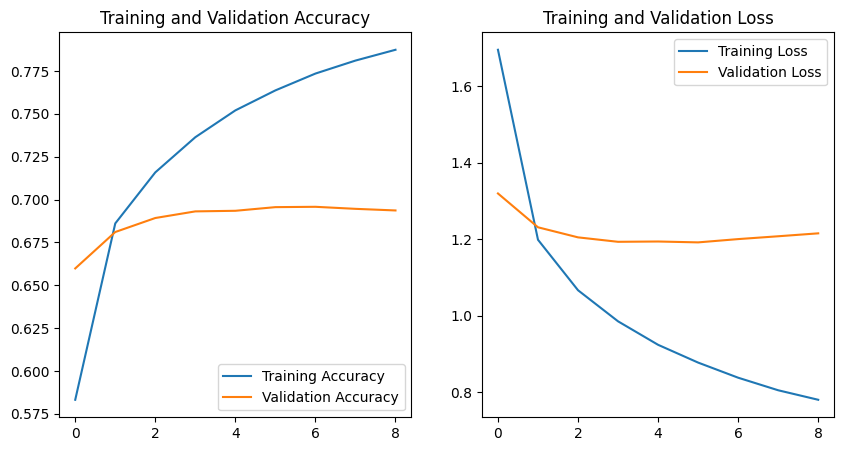

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('efficientnet1.png')
plt.show()

미세 조정

In [37]:
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks2 = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=1,
        restore_best_weights=True
    )
]

In [41]:
history_fine_tune = model.fit(
    train_ds2,
    validation_data=val_ds2,
    epochs=100,
    callbacks=callbacks2
)

Epoch 1/100
 645/2525 ━━━━━━━━━━━━━━━━━━━━ 1:03 34ms/step - accuracy: 0.8032 - loss: 0.7430

KeyboardInterrupt: 

In [38]:
val_loss, val_acc=model.evaluate(val_ds2)
print(f"테스트 데이터셋의 손실(Loss): {val_loss:.4f}")
print(f"테스트 데이터셋의 정확도(Accuracy): {val_acc:.4f}")

632/632 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.7093 - loss: 1.1397
테스트 데이터셋의 손실(Loss): 1.1380
테스트 데이터셋의 정확도(Accuracy): 0.7099


NameError: name 'history_fine_tune' is not defined

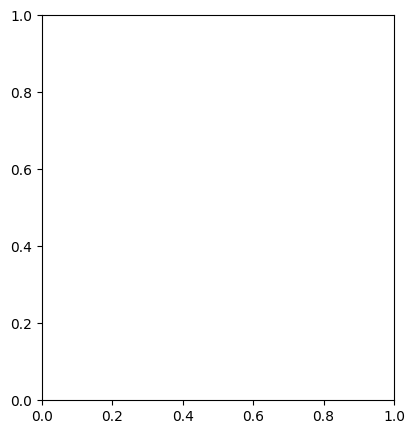

In [39]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('efficientnet1.png')
plt.show()

In [ ]:
model.save('model_efB0.h5')

EfficientNetB4

In [ ]:
from tensorflow.keras.applications import EfficientNetB4

In [ ]:
IMG_SIZE2 = (380, 380)
BATCH_SIZE = 16

In [ ]:
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image, label

In [ ]:
train_ds3 = image_dataset_from_directory(
    f"{path}/images",
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=IMG_SIZE2,
    batch_size=BATCH_SIZE
).map(preprocess_image)

val_ds3 = image_dataset_from_directory(
    f"{path}/images",
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=IMG_SIZE2,
    batch_size=BATCH_SIZE
).map(preprocess_image)

In [ ]:
base_model = EfficientNetB4(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(101, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
]

In [ ]:
history_fine_tune = model.fit(
    train_ds3,
    validation_data=val_ds3,
    epochs=100,
    callbacks=callbacks
)